In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df_land = pd.read_csv("../res/data/land_prices.csv", index_col=0)


In [4]:
df_land.head()


,Neighborhood_FID,Land_Value,Area_Count,City_Name,AgriculturalArea,CommercialBuildingArea,Farmland,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village
0,1,788.8,25,Köln,0,0,1,0,1,0,0,0,1,1,0
1,2,874.9,32,Köln,0,0,1,1,1,0,1,1,1,1,0
2,3,468.4,18,Köln,0,0,1,1,1,0,1,0,1,1,0
3,4,286.0,25,Köln,1,0,1,0,1,0,0,0,1,1,0
4,5,652.8,20,Köln,0,0,1,1,0,0,0,0,1,1,0


In [5]:
df_land.dtypes


Neighborhood_FID            int64
Land_Value                float64
Area_Count                  int64
City_Name                  object
AgriculturalArea            int64
CommercialBuildingArea      int64
Farmland                    int64
ForestryArea                int64
GreenArea                   int64
IndustrialArea              int64
MixedUseArea                int64
OtherSpecialArea            int64
Residential                 int64
SpecialUseArea              int64
Village                     int64
dtype: object

In [6]:
x_columns = [
    "AgriculturalArea",
    "CommercialBuildingArea",
    "Farmland",
    "ForestryArea",
    "GreenArea",
    "IndustrialArea",
    "MixedUseArea",
    "OtherSpecialArea",
    "Residential",
    "SpecialUseArea",
    "Village",
]


In [7]:
X, y = df_land[x_columns], df_land["Land_Value"]


In [8]:
reg = LinearRegression().fit(X, y)


In [9]:
reg.score(X, y)


0.3027925193140325

In [10]:
reg.coef_


array([-437.33805882,  -63.10259251, -557.58905147, -165.31702247,
       -232.28181819, -193.86550098, 1315.80195747, -455.3626437 ,
       -581.28976437,  655.8921807 , -158.11699498])

In [11]:
x_columns


['AgriculturalArea',
 'CommercialBuildingArea',
 'Farmland',
 'ForestryArea',
 'GreenArea',
 'IndustrialArea',
 'MixedUseArea',
 'OtherSpecialArea',
 'Residential',
 'SpecialUseArea',
 'Village']

MixedUsedArea & SpecialUseArea only with positive coefficients

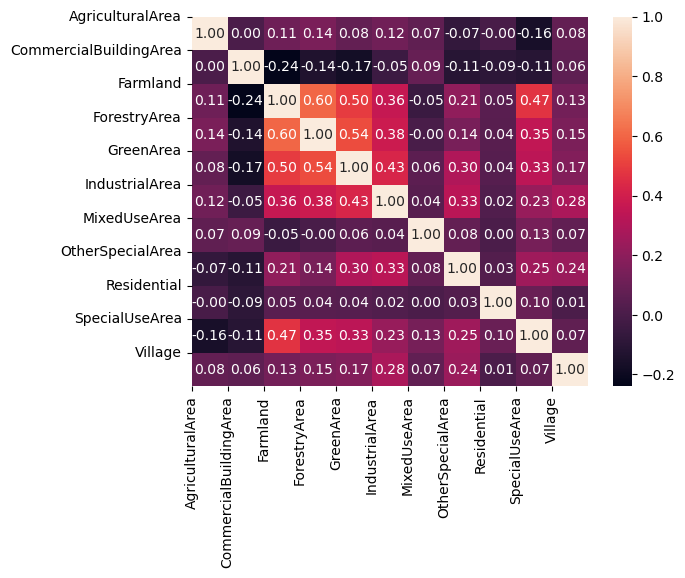

In [18]:
fig, ax = plt.subplots()
correlations = df_land[x_columns].corr()
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
cax = sns.heatmap(correlations, annot=True, fmt=".2f")
ticks = np.arange(0, 11, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(x_columns, rotation=90)
ax.set_yticklabels(x_columns)
plt.show()


In [13]:
correlations


,AgriculturalArea,CommercialBuildingArea,Farmland,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village
AgriculturalArea,1.000000,0.002084,0.113220,0.144657,0.077288,0.118005,0.069582,-0.072491,-0.002963,-0.161903,0.079122
CommercialBuildingArea,0.002084,1.000000,-0.240213,-0.135455,-0.172503,-0.045108,0.085778,-0.110023,-0.090285,-0.112662,0.062636
Farmland,0.113220,-0.240213,1.000000,0.602455,0.495997,0.361170,-0.050915,0.210001,0.049878,0.468496,0.127207
ForestryArea,0.144657,-0.135455,0.602455,1.000000,0.538406,0.382606,-0.001174,0.139286,0.042132,0.348824,0.150594
GreenArea,0.077288,-0.172503,0.495997,0.538406,1.000000,0.428015,0.058633,0.299333,0.037922,0.334694,0.167315
IndustrialArea,0.118005,-0.045108,0.361170,0.382606,0.428015,1.000000,0.042919,0.327427,0.022273,0.229046,0.284870
MixedUseArea,0.069582,0.085778,-0.050915,-0.001174,0.058633,0.042919,1.000000,0.075498,0.004518,0.134329,0.074242
OtherSpecialArea,-0.072491,-0.110023,0.210001,0.139286,0.299333,0.327427,0.075498,1.000000,0.026674,0.249142,0.237871
Residential,-0.002963,-0.090285,0.049878,0.042132,0.037922,0.022273,0.004518,0.026674,1.000000,0.097242,0.006345
SpecialUseArea,-0.161903,-0.112662,0.468496,0.348824,0.334694,0.229046,0.134329,0.249142,0.097242,1.000000,0.065248
